In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from icecream import ic
sns.set_style('whitegrid')

from typing import List, Union

In [70]:
# Generates normal data.
sample_data = np.random.normal(loc=62231, scale=5000, size=20)
sample_data

array([69547.13967673, 67711.42752702, 64419.96331342, 57733.62731524,
       65445.56065928, 59990.03132818, 57639.15302797, 62956.93892356,
       64803.21658341, 56691.66526029, 60415.47910027, 59983.56951068,
       52544.19098395, 60165.24005145, 68399.54496343, 70303.85004209,
       57045.78802753, 58620.60575946, 58290.10649087, 68365.59923304])

In [66]:
# Define a function to perform bootstrap resampling.
def bootstrap_resample(data: np.ndarray) -> np.ndarray:
    return np.random.choice(data, size=len(data), replace=True)
    
bootstraped_samples = [bootstrap_resample(sample_data) for _ in range(10000)]

# Calculate the sample statistics for each resample.
sample_statistics = np.mean(bootstraped_samples, axis=1)

# Calculate the sample statistic from all bootstraped data.
sample_stat = np.mean(bootstraped_samples)

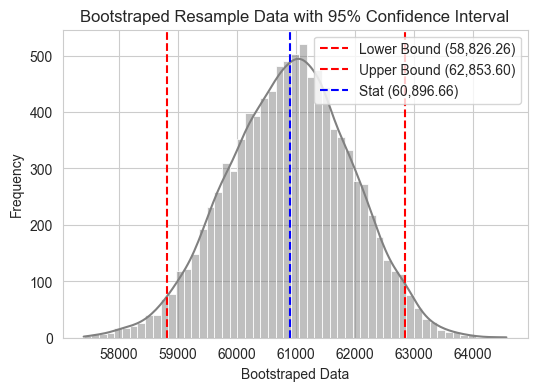

In [69]:
# Calculate the confidence interval bounds.
ci_percent = 95
lower_bound = np.percentile(sample_statistics, (100- ci_percent) / 2)
upper_bound = np.percentile(sample_statistics, 100 - (100 - ci_percent) / 2)

# Plotting
plt.figure(figsize=(6, 4))
sns.histplot(sample_statistics, kde=True, color='grey')

plt.axvline(lower_bound, color='red', linestyle='dashed', label=f'Lower Bound ({lower_bound:,.2f})')
plt.axvline(upper_bound, color='red', linestyle='dashed', label=f'Upper Bound ({upper_bound:,.2f})')
plt.axvline(sample_stat, color='blue', linestyle='dashed', label=f'Stat ({sample_stat:,.2f})')

plt.title(f'Bootstraped Resample Data with {ci_percent}% Confidence Interval')
plt.xlabel('Bootstraped Data')
plt.ylabel('Frequency')

plt.legend()
plt.show()